# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data = student_data.reset_index().rename(columns={'index': 'StudentID'})
student_data

,StudentID,Age,Tardies
0,0,17,10
1,1,51,1
2,2,27,5
3,3,21,9
4,4,36,4
5,5,48,2
6,6,19,9
7,7,26,6
8,8,54,0
9,9,30,3


Draw a dispersion diagram (scatter plot) for the data.

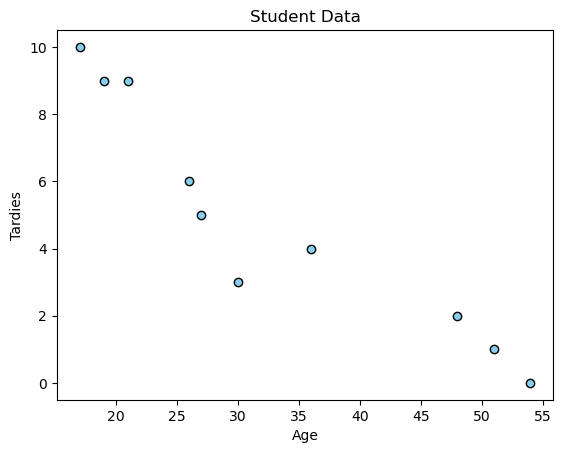

In [10]:
x = student_data["Age"]
y = student_data["Tardies"]
plt.scatter(x,y, c="skyblue", edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.title("Student Data")
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
"""
It can be seen that there is a correlation between Age and Number of Tardies. The older the Student, the less tardies
"""

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [17]:
# Your response here.
#correlation:
correlation = student_data.corr()
display(correlation)

#covariance:
cov = student_data.cov()
display(cov)

,StudentID,Age,Tardies
StudentID,1.000000,0.186190,-0.347113
Age,0.186190,1.000000,-0.939163
Tardies,-0.347113,-0.939163,1.000000


,StudentID,Age,Tardies
StudentID,9.166667,7.722222,-3.722222
Age,7.722222,187.655556,-45.566667
Tardies,-3.722222,-45.566667,12.544444


In [ ]:
"""
As both Correlation and Covariance show negative Values for the Correlation between Age and Tardies it can be said, that
the older a student gets, the less Tardies he get. Therefore, it is an anti-correlation. Moreover 0.9 as Correlation and
-45.566667 as Covariance indicate a that the strenght of the Correlation is quite high. 
The Difference between those two measures is that Covariance is not standardized, that's why the range is unbound and 
interpretation of the strenght more difficult."""

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [25]:
x = np.array(student_data["Age"])
y = np.array(student_data["Tardies"])
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

model = LinearRegression()

model.fit(x,y)
slope = model.coef_
interception = model.intercept_

reg_line = interception + slope*x
pred = model.predict(x)

print("r^2 :", model.score(x,y))
print("rmse: ", np.sqrt(mean_squared_error(pred, y)))

r^2 : 0.8820265558250109
rmse:  1.1540884648655088


In [ ]:
"""
I am using a Linear Regression, as the Correlation between the do Attribute is Linear ass well. My outcome varaible is a
reg_line, which i can use to check tardies for each age.
"""

Plot your regression model on your scatter plot.

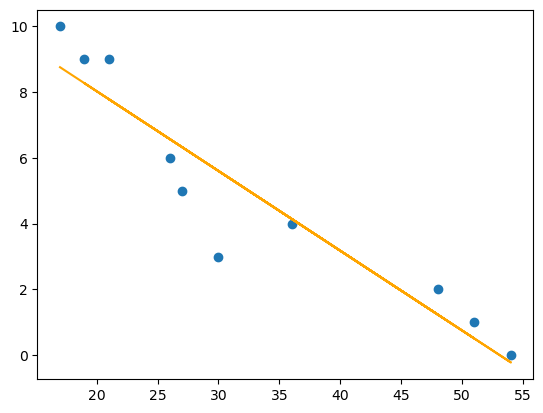

In [27]:
plt.plot(x,reg_line, c="orange")
plt.scatter(x,y)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
"""
The Conclusion stays the same as before: The younger a Student, the more Tardies. I am very confident in the conclusion and
the model as the model has a r^2 of 0.88 and rmse of 1.15 .

"""

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [28]:
# Import any libraries you may need & the data
df = pd.read_csv("vehicles.csv")
df

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [33]:
my_list = ["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]
x = df[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]
y = df["CO2 Emission Grams/Mile"]
corr = df.corr()
for i in my_list:
    print(f"{i}: {corr.loc[i, 'CO2 Emission Grams/Mile']}")

Year: -0.22229960295056833
Cylinders: 0.7523925537297477
Fuel Barrels/Year: 0.9861886621428763
Combined MPG: -0.9262290389336436
Fuel Cost/Year: 0.9308651512201764


C:\Users\Jacob\AppData\Local\Temp\ipykernel_22204\3164870179.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


In [34]:
"""
Most helpful: Combined MPG and Fuel Cost/Year and Fue Barrels/Year
Least helpful: Year
"""

'\nMost helpful: Combined MPG and Fuel Cost/Year and Fue Barrels/Year\nLeast helpful: Year\n'

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [44]:
x = df[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]
y = df["CO2 Emission Grams/Mile"]

model = LinearRegression()

model.fit(x,y)
slope = model.coef_
interception = model.intercept_


reg_line = interception + slope[0]*x["Year"]+slope[1]*x["Cylinders"]+slope[2]*x["Fuel Barrels/Year"]+slope[3]*x["Combined MPG"]+slope[4]*x["Fuel Cost/Year"]
pred = model.predict(x)

print("r^2 :", model.score(x,y))
print("rmse: ", np.sqrt(mean_squared_error(pred, y)))

r^2 : 0.9808734920269122
rmse:  16.465711496024085


In [ ]:
"""
I used Linear Regression for this model.Most helpful: Combined MPG and Fuel Cost/Year and Fuel Barrels/Year
Least helpful: Year
Because they have the biggest/smallest Correlation with CO2 Emissions.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [46]:
print("r^2 :", model.score(x,y))
print("rmse: ", np.sqrt(mean_squared_error(pred, y)))

"""
The Model is very accurate. 
"""

r^2 : 0.9808734920269122
rmse:  16.465711496024085


'\nThe Model is extremeley accurate. \n'

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [22]:
parties = pd.DataFrame({"X":[1,3,4,6,8,9,11,14], "Y":[1,2,4,4,5,7,8,13]})
parties

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

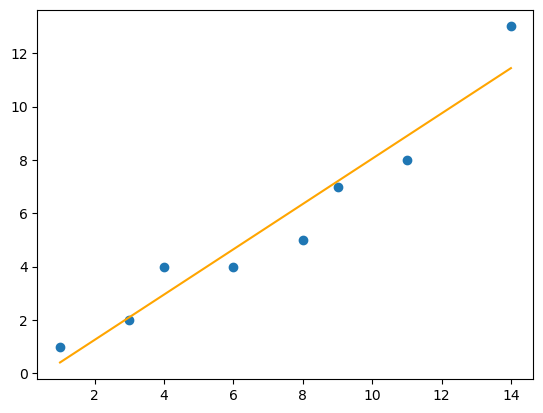

In [23]:
model = LinearRegression()
x = np.array(parties["X"])
y = np.array(parties["Y"])

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

model.fit(x,y)
slope = model.coef_
interception = model.intercept_
reg_line = interception + slope*x

plt.plot(x, reg_line, c="orange")
plt.scatter(x,y)
plt.show()

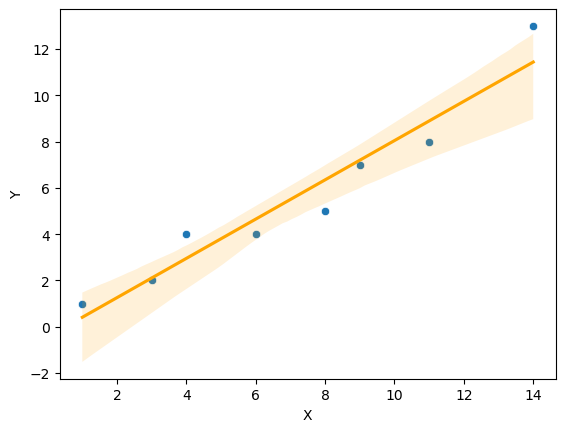

In [24]:
import seaborn as sns
sns.scatterplot(x ="X", y = "Y", data = parties)
plt.xlabel("invitations")
plt.ylabel("attended")

sns.regplot(x ="X", y = "Y", data = parties, scatter = False, color = "orange")
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [25]:
"""
The more people are invited, the more people are attending. Most times the number of people attending is under the regline.
This shows that the hypothesis, although only to a small extent, is true.

"""

'\nThe more people are invited, the more people are attending. Most times the number of people attending is under the regline.\nThis shows that the hypothesis, although only to a small extent, is true.\n\n'

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [30]:
## Outliers

q1 = parties["Y"].quantile(0.25)
q3 = parties["Y"].quantile(0.75)
IQR = q3 - q1

upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
parties = parties[(parties["Y"]>=lower_bound) & (parties["Y"]<=upper_bound)]
parties

,X,Y
2,4,4
3,6,4
4,8,5
5,9,7


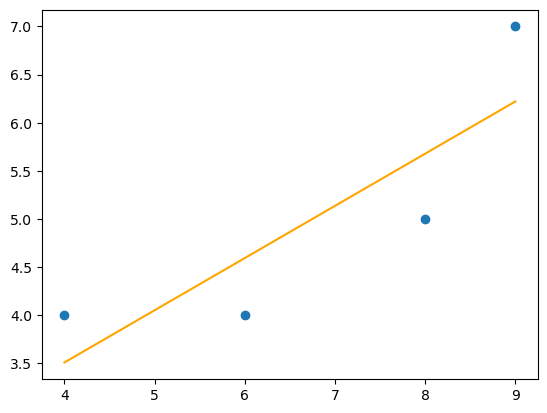

In [31]:
x = np.array(parties["X"])
y = np.array(parties["Y"])
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

model.fit(x,y)
slope = model.coef_
interception = model.intercept_
reg_line = interception + slope*x

plt.plot(x, reg_line, c="orange")
plt.scatter(x,y)
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [33]:
"""
now more outliers. half of the points above and half of the points below the regline.
"""

'\nnow more outliers. half of the points above and half of the points below the regline.\n'